# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [1]:
import pandas as pd

#read data
data = pd.read_csv('peer_effects_room.csv')

data['person_other'] = 'placeholde' # placeholder values for 'person_other'-column
room_people = data.groupby('room').person.unique() # idx = room, values = array of people in the room

for rooms, persons_in_room in room_people.iteritems(): # Loop through rooms and persons_in_rooms
    for idx_and_id in data[data.room == rooms].index: # Loop over persons in the room (their idx's are the same as their id's)
        data.loc[idx_and_id, 'person_other'] = [x for x in persons_in_room if x != idx_and_id][0] # Only keep the roommate

#Check if correctly grouped
data.sort_values('room').head(10)

,person,room,high_school_GPA,college_GPA,person_other
1757,1757,0,-0.181905,0.566177,1603
1603,1603,0,-0.622770,0.540078,1757
1649,1649,1,0.378918,0.033256,466
466,466,1,-2.248266,-3.596904,1649
1929,1929,2,-0.095399,-0.052611,816
816,816,2,-0.798128,-1.811919,1929
1719,1719,3,1.885767,-1.104111,481
481,481,3,-1.094094,-2.096950,1719
1108,1108,4,0.977881,0.880004,1887
1887,1887,4,-2.513904,0.225987,1108


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [2]:
#Extract and rename
for_merge = data[['high_school_GPA', 'college_GPA', 'person']]\
                .rename(columns = {'high_school_GPA': 'high_school_GPA_other',
                                  'college_GPA':'college_GPA_other',
                                  'person':'person_other'})

#merge
data = pd.merge(data, for_merge, on = 'person_other', validate = '1:1')

#print to validate
data.sort_values('room').head(4)

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
1757,1757,0,-0.181905,0.566177,1603,-0.622770,0.540078
1603,1603,0,-0.622770,0.540078,1757,-0.181905,0.566177
1649,1649,1,0.378918,0.033256,466,-2.248266,-3.596904
466,466,1,-2.248266,-3.596904,1649,0.378918,0.033256


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.style.use('ggplot')

/Users/Esben/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#################################### Define some functions #################################
#Def function for plotting
def plot_fig(x, y, title, x_label, y_label):
    
    fig, ax = plt.subplots(1,1, figsize = (15,10))

    #Scatter plot
    ax.set_title(title, size = 15)
    ax.set_xlabel(x_label, size = 15)
    ax.set_ylabel(y_label, size = 15)
    plt.scatter(x, y)

    #Plot simple linear regression line
    # beta1 = slope, beta0=intercept
    beta1, beta0 = np.polyfit(x, y, 1)
    plt.plot(x, beta1*x + beta0)
    
#Def function for OLS 
def run_ols(x,y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    print(results.summary())

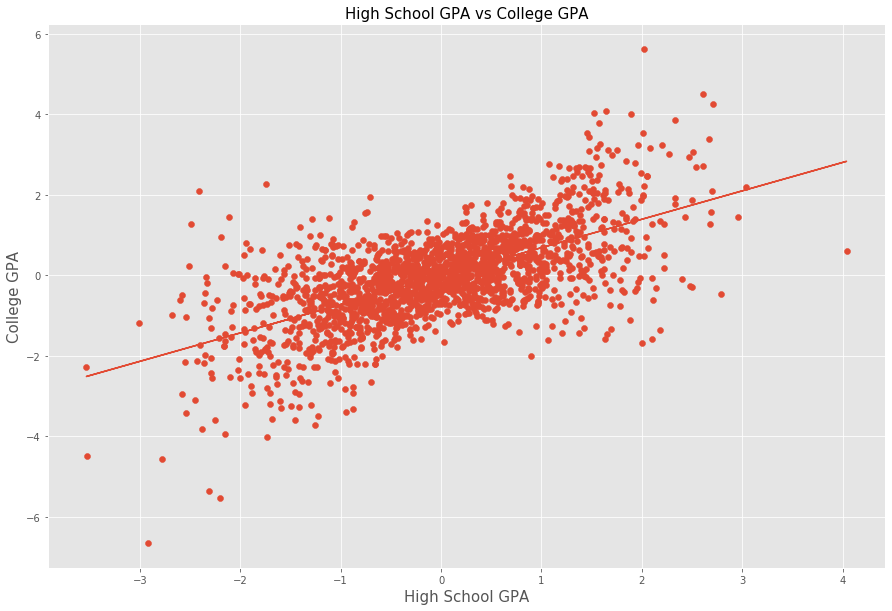

In [5]:
# Plot high_school_GPA and college_GPA
plot_fig(data['high_school_GPA'], data['college_GPA'], 
         title = 'High School GPA vs College GPA', 
         x_label = 'High School GPA', 
         y_label = 'College GPA')

High School- and College GPA looks positivly correlated

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

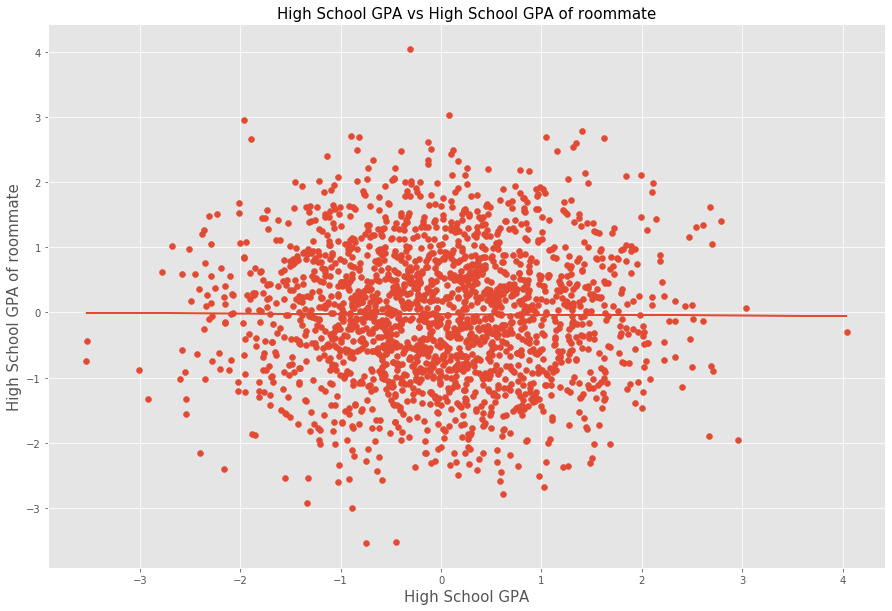

In [6]:
# Plot high_school_GPA and high_school_GPA_other
plot_fig(data['high_school_GPA'], data['high_school_GPA_other'], 
         title = 'High School GPA vs High School GPA of roommate', 
         x_label = 'High School GPA', 
         y_label = 'High School GPA of roommate')

The Highschool GPA's look uncorrelated based on the regressionline (slope = 0) and the cloud-like formation of the scatterplot, which indicates orthogonality.

In [7]:
#Run simple OLS
run_ols(data['high_school_GPA'], data['high_school_GPA_other'])

                              OLS Regression Results                             
Dep. Variable:     high_school_GPA_other   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                   0.07263
Date:                   Mon, 18 May 2020   Prob (F-statistic):              0.788
Time:                           20:37:25   Log-Likelihood:                -2883.6
No. Observations:                   2000   AIC:                             5771.
Df Residuals:                       1998   BIC:                             5782.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

**Answer 12.1.4**: The beta-coefficinet is not statistically significantly different from 0 (p-value = 0.788) --> the varibles are orthogonal / uncorrelated, which indicates that the roommate assignment is random (at least with regards to high school GPA)

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

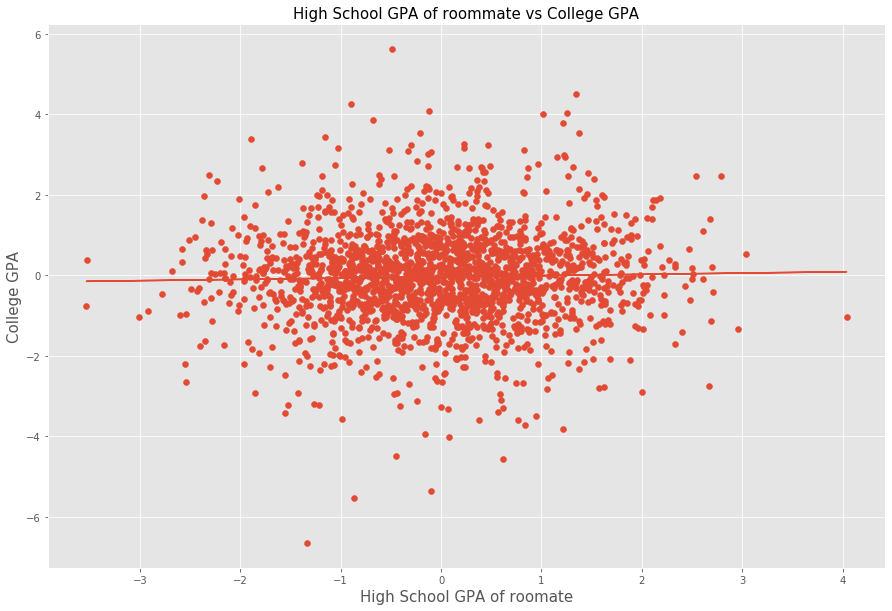

In [164]:
plot_fig(data['high_school_GPA_other'], data['college_GPA'], 
         title = 'High School GPA of roommate vs College GPA', 
         x_label = 'High School GPA of roomate', 
         y_label = 'College GPA')

The correlation looks slightly positive based on the regression line, but probabily not to a statistically significant degree. Based on the scatter plot the variables looks orthogonal.

In [10]:
#Run OLS
run_ols(data[['high_school_GPA','high_school_GPA_other']], data['college_GPA'])

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Mon, 18 May 2020   Prob (F-statistic):          1.03e-223
Time:                        20:39:10   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

**Answer 12.1.5**: As expected based on the plot, the beta-coefficinet for the high school GPA of the roommate is not statistically significantly different from 0 at $\alpha$ = 5% (p-value = 0.065) --> the variables are orthogonal / uncorrelated. The high school GPA of ones roommate does not have an effect on ones own college GPA.

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [11]:
# Run OLS
run_ols(data[['high_school_GPA','college_GPA_other']], data['college_GPA'])

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Mon, 18 May 2020   Prob (F-statistic):          4.46e-226
Time:                        20:47:04   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0209      0.02

The assignment was formulated as is we were to run the same regression as in 12.1.5. We expect that it is a mistake, and we have instead estimated the effect of the roommates college GPA on ones own college GPA, while controlling for ones high school GPA.

**Answer 12.1.6**: It would appear that the endogenous peer effect (the college GPA of ones roommate) is statistically significant and positivitly correlated (p < 0.000 and beta = 0.017). The college GPA of ones roommate has an effect on ones own college GPA and vice versa (difficult to say which way the causality goes - matual / reciprocal effect?).

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

They try identify the peer effect of socioeconomical background, with regard to ones own performance in school. 

They do this by exploiting the variation in class composition from year to year, as opposed to between schools, as the latter would pose 'omitted variable bias' in the estimation (is that correlated / exogenous effects?). 

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

They only control for gender on an individual level with regard to estimating performance, but not the gender distribution/composition of the classroom/peers. Hoxby tries to identify the peer effect based on racial and gender composition - and she finds that the gender composition matters! More females, better grades for all. 

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

Research has been conducted on twins. It could be interesting to identify peer effects (such as academic performance / grades) by examining twins, who are 'put' in different classes, but on the same school. It would be necesarry for the different classes to have variation from one another, with regards to e.g. gender-, racial- and/or socioeconomic background composition.